In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
# DataFrame
import pandas as pd
# Matplot
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')
# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime
# Warnings
import warnings 
warnings.filterwarnings('ignore')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


About the Dataset
The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

In [3]:
df = pd.read_csv(r'D:\NLP\NLP Diploma Shaai For AI Using Pytourch\nlp-course-notebooks-master\codealpha\task1 spam_or_not\emails.csv', encoding='latin-1')

In [4]:
print(df.shape)

(5172, 3002)


In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Remove the first column (Email name) as it is not relevant for the prediction
df = df.drop(columns=['Email No.'])

In [7]:
df.shape

(5172, 3001)

In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
# check for missing values
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

541

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

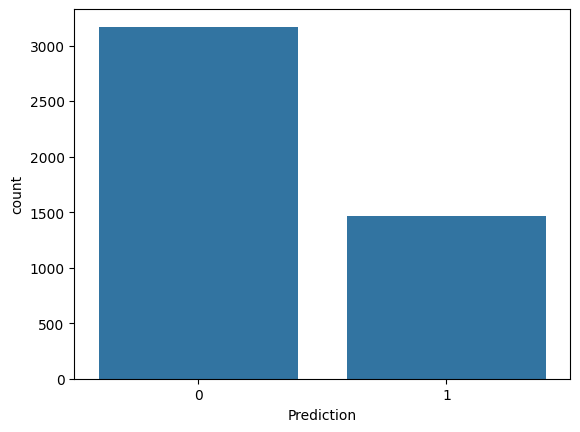

In [14]:
# count plot of the Prediction column

sns.countplot(data=df, x='Prediction', color=sns.color_palette()[0])

plt.show()

In [25]:
df.head()
df.tail()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1
5171,22,24,5,1,6,5,148,8,2,23,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Including Stopwords and exclusing 'not' related stopwords

stop_words = set(stopwords.words("english"))
stop_words.remove('not')
more_stopwords = {'ect', 'be', 'hou', 'the', 'sayi', 'ff', 'Unknown'}
stop_words = stop_words.union(more_stopwords)
                 
stemmer = SnowballStemmer("english")

In [37]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

Split the data into Training and Testing Set

In [15]:
# Split the data into features (X) and labels (y)
X = df.drop(columns="Prediction")
y = df['Prediction']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(x_train, y_train)
#knn_y_pred = knn.predict(x_test)

KNeighborsClassifier(n_neighbors=7)

In [48]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [49]:
# Make predictions
nb_y_pred = nb.predict(x_test)

In [50]:
results = {}
# Evaluate the KNN model
from sklearn import metrics
KNN_accuracy = metrics.accuracy_score(y_test, nb_y_pred)
KNN_precision = metrics.precision_score(y_test, nb_y_pred)
KNN_recall = metrics.recall_score(y_test, nb_y_pred)
KNN_f1 = metrics.f1_score(y_test, nb_y_pred)
KNN_error_rate = 1 - KNN_accuracy  #

# Store the results of KNN model in the dictionary
results["KNN"] = {"accuracy": KNN_accuracy,
                  "precision": KNN_precision,
                  "recall": KNN_recall,
                  "f1_score": KNN_f1,
                  "error_rate":KNN_error_rate  #
                 }

Text(0.5, 1.0, 'Confusion Matrix for Multinomial Classifier')

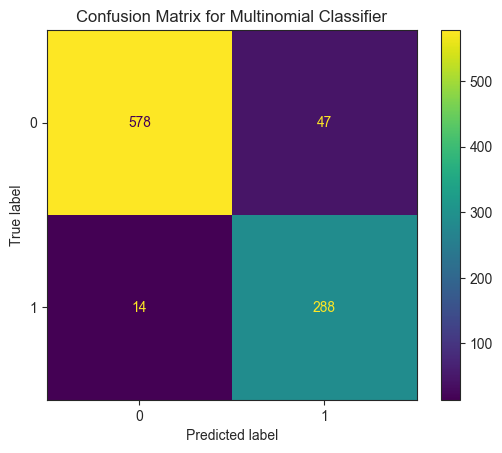

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,nb_y_pred)).plot()
plt.title("Confusion Matrix for Multinomial Classifier")

In [51]:
#Fitting The Classifier  to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(x_train,y_train)
RF_y_pred = RF.predict(x_test)

In [52]:
# Evaluate the Random Forest Classifier model
RF_accuracy = metrics.accuracy_score(y_test, RF_y_pred)
RF_precision = metrics.precision_score(y_test, RF_y_pred)
RF_recall = metrics.recall_score(y_test, RF_y_pred)
RF_f1 = metrics.f1_score(y_test, RF_y_pred)
RF_error_rate = 1 - RF_accuracy


# Store the results of Random Forest model in the dictionary
results["RF"] = {"accuracy": RF_accuracy,
                  "precision": RF_precision,
                  "recall": RF_recall,
                  "f1_score": RF_f1,
                  "error_rate": RF_error_rate
                 }

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

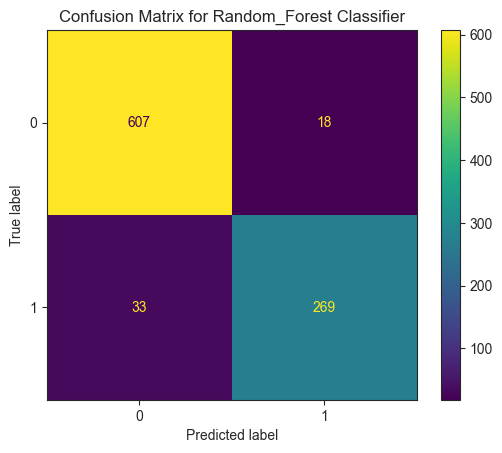

In [70]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,RF_y_pred)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)

In [54]:
# Evaluate the Decision Tree Classifier model
DT_accuracy = metrics.accuracy_score(y_test, DT_y_pred)
DT_precision = metrics.precision_score(y_test, DT_y_pred)
DT_recall = metrics.recall_score(y_test, DT_y_pred)
DT_f1 = metrics.f1_score(y_test, DT_y_pred)
DT_error_rate = 1 - DT_accuracy

# Store the results of Decision Tree model in the dictionary
results["DT"] = {"accuracy": DT_accuracy,
                  "precision": DT_precision,
                  "recall": DT_recall,
                  "f1_score": DT_f1,
                  "error_rate": DT_error_rate
                 }

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

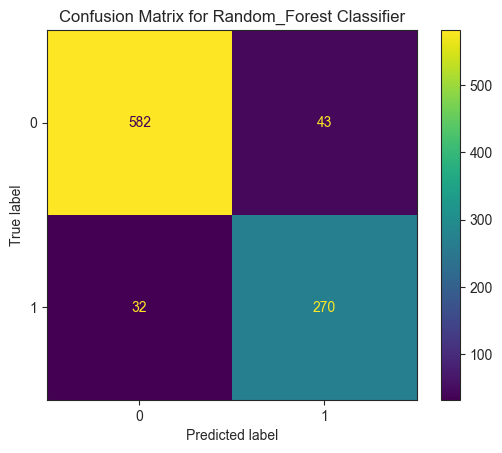

In [71]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,DT_y_pred)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_y_pred = LR.predict(x_test)

In [56]:
# Evaluate the LogisticRegression Classifier model
LR_accuracy = metrics.accuracy_score(y_test, LR_y_pred)
LR_precision = metrics.precision_score(y_test, LR_y_pred)
LR_recall = metrics.recall_score(y_test, LR_y_pred)
LR_f1 = metrics.f1_score(y_test, LR_y_pred)
LR_error_rate = 1 - LR_accuracy

# Store the results of LogisticRegression model in the dictionary
results["LR"] = {"accuracy": LR_accuracy,
                  "precision": LR_precision,
                  "recall": LR_recall,
                  "f1_score": LR_f1,
                  "error_rate": LR_error_rate
                 }

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

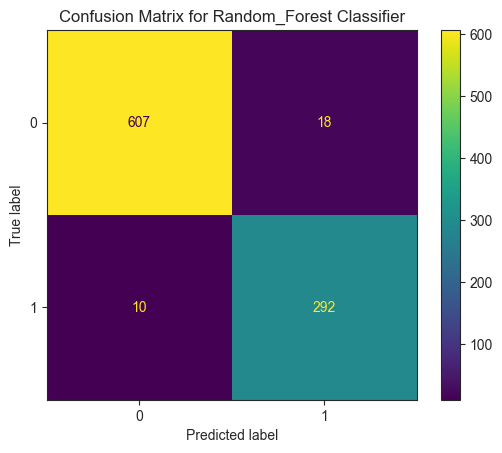

In [72]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,LR_y_pred)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

In [57]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
GNB_y_pred = GNB.predict(x_test)

In [58]:
# Evaluate the GNB Classifier model
GNB_accuracy = metrics.accuracy_score(y_test, GNB_y_pred)
GNB_precision = metrics.precision_score(y_test, GNB_y_pred)
GNB_recall = metrics.recall_score(y_test, GNB_y_pred)
GNB_f1 = metrics.f1_score(y_test, GNB_y_pred)
GNB_error_rate = 1 - GNB_accuracy

# Store the results of LogisticRegression model in the dictionary
results["GNB"] = {"accuracy": GNB_accuracy,
                  "precision": GNB_precision,
                  "recall": GNB_recall,
                  "f1_score": GNB_f1,
                  "error_rate": GNB_error_rate
                 }

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

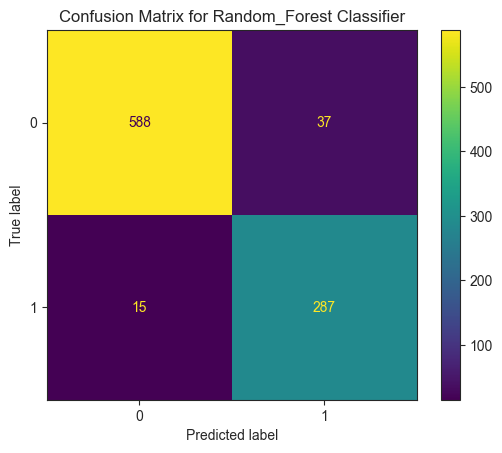

In [73]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,GNB_y_pred)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

In [59]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train,y_train)
SVM_y_pred = SVM.predict(x_test)

In [60]:
# Evaluate the LogisticRegression Classifier model
SVM_accuracy = metrics.accuracy_score(y_test, SVM_y_pred)
SVM_precision = metrics.precision_score(y_test, SVM_y_pred)
SVM_recall = metrics.recall_score(y_test, SVM_y_pred)
SVM_f1 = metrics.f1_score(y_test, SVM_y_pred)
SVM_error_rate = 1 - SVM_accuracy

# Store the results of LogisticRegression model in the dictionary
results["SVM"] = {"accuracy": SVM_accuracy,
                  "precision": SVM_precision,
                  "recall": SVM_recall,
                  "f1_score": SVM_f1,
                  "error_rate": SVM_error_rate
                 }

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

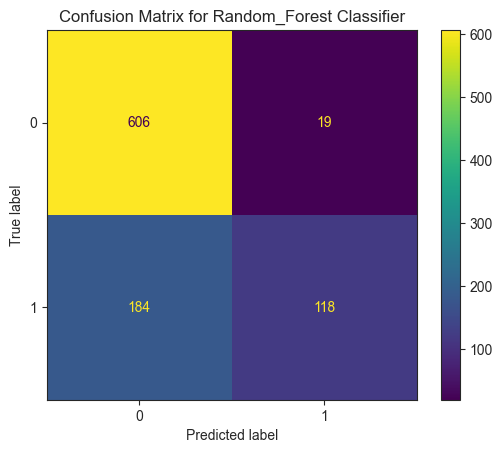

In [74]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,SVM_y_pred)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

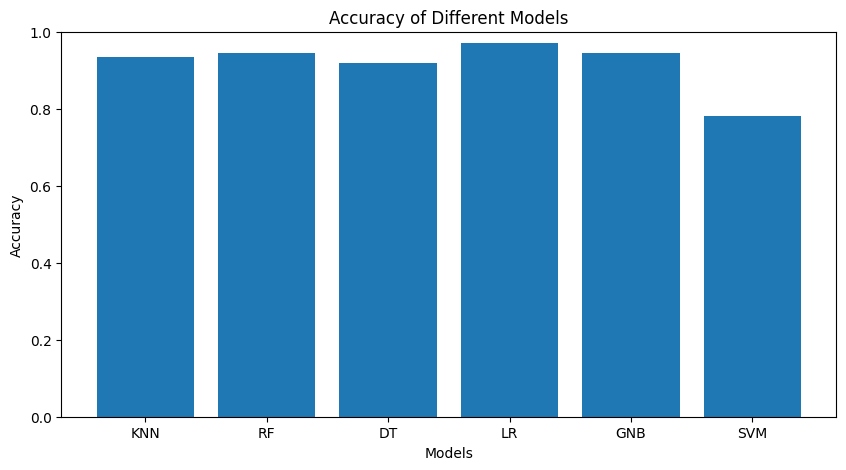

In [61]:
# Plot the accuracy of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

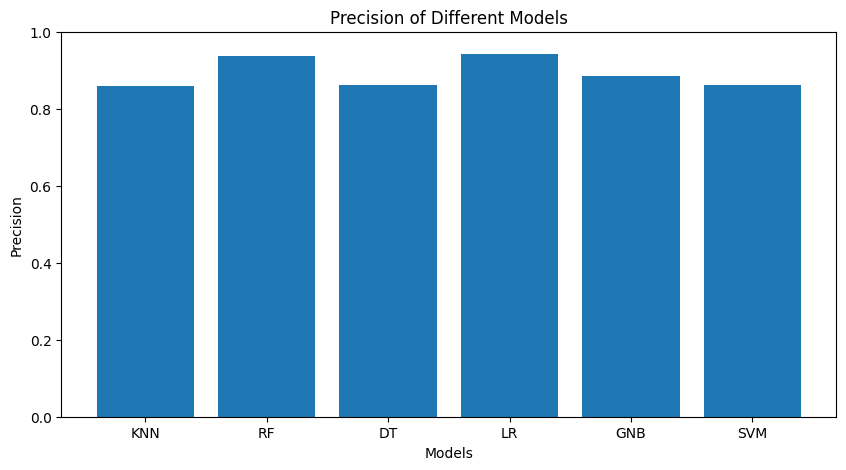

In [62]:
# Plot the precision of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

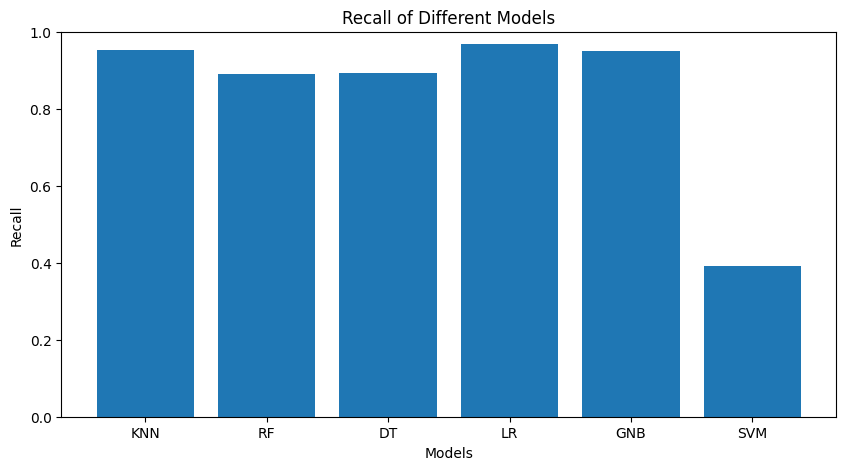

In [63]:
# Plot the recall of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

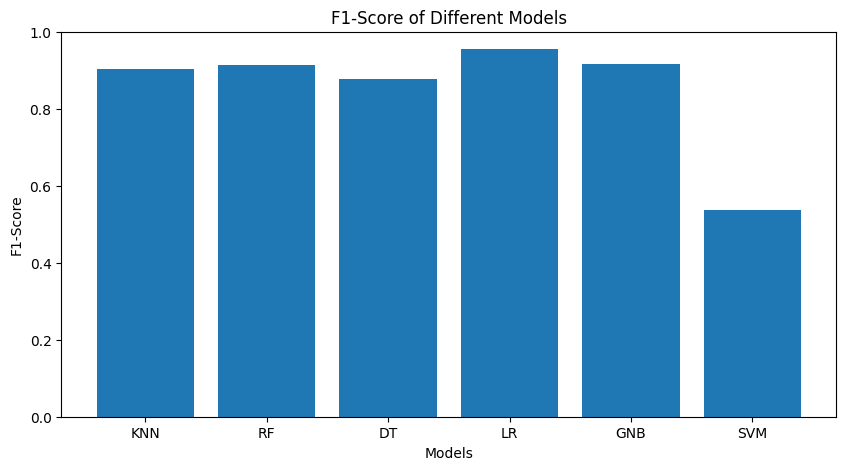

In [65]:
# Plot the F1-score of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

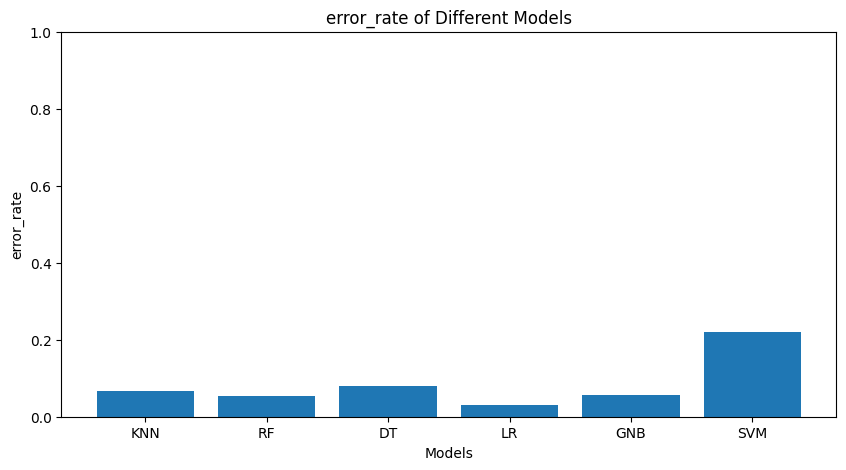

In [66]:
# Plot the error_rate of all models
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["error_rate"] for result in results.values()])
plt.title("error_rate of Different Models")
plt.xlabel("Models")
plt.ylabel("error_rate")
plt.ylim(0, 1)
plt.show()

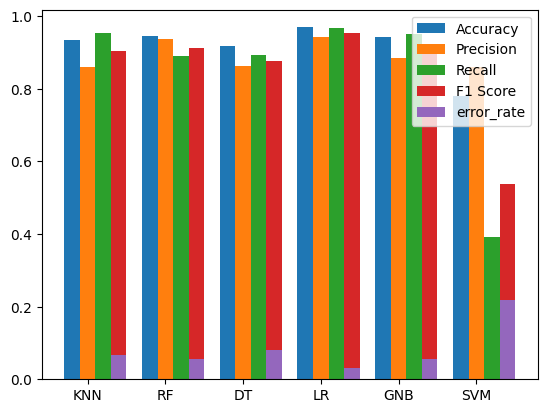

In [67]:
# extract metrics values
import numpy as np
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]
error_rate = [results[model]['error_rate'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')
plt.bar(index + 3 * bar_width, error_rate, bar_width, label='error_rate')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()
plt.show()